In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

2022-12-02 13:01:04.900345: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-02 13:01:04.997622: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-02 13:01:05.334167: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-02 13:01:05.334204: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

The dataset contain 35,685 examples of 48x48 pixel gray scale images of faces divided into train and test dataset. Images are categorized based on the emotion shown in the facial expressions (happiness, neutral, sadness, anger, surprise, disgust, fear).

In [8]:
train_dir = "./train" 
test_dir = "./test"   

In [9]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [22]:
print ("Final model created:")
model.summary()

Final model created:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (Non

In [10]:
img_size=48

In [11]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [12]:
!pwd

/home/romagnolilab/Downloads/CSC4444


In [13]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [ ]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

# Visualize the dataset

/tmp/ipykernel_3605001/2171061241.py:24: UserWarning: Glyph 128127 (\N{IMP}) missing from current font.
  plt.tight_layout()


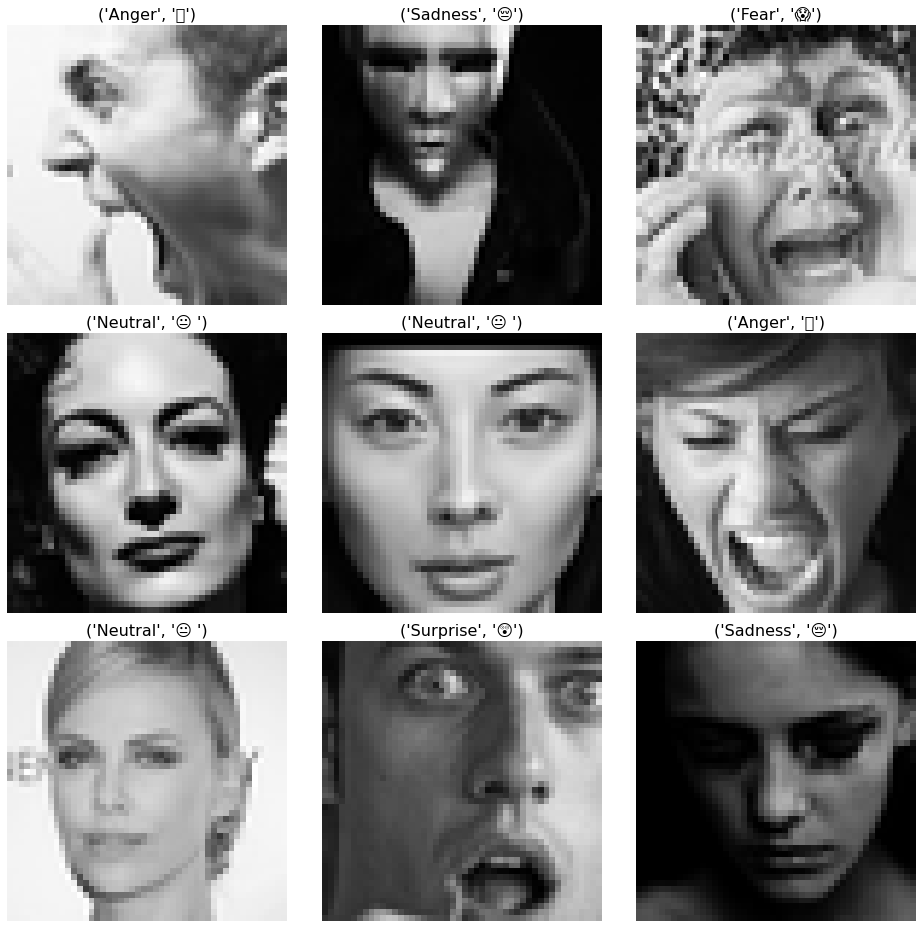

In [63]:
from IPython.display import clear_output
# Data assignment
class_labels  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
class_labels_emoji = ["👿", "🤢" , "😱" , "😊" , "😐 ", "😔" , "😲" ]
SEED = 12
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 64
NUM_CLASSES = 7
#
# Basic Functions
def single_image(image, title, subplot, color):
    plt.subplot(subplot)
    plt.axis('off')
    plt.imshow(image)
    plt.title(title, fontsize=16)
    
def display_images(images, titles, title_colors=None):
    subplot = 331
    plt.figure(figsize=(13,13))
    for i in range(9):
        color = 'black' if title_colors is None else title_colors[i]
        single_image(images[i], titles[i], 331+i, color)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

# generate image from train data
img_datagen = ImageDataGenerator(rescale = 1./255)
img_generator = img_datagen.flow_from_directory(directory = train_dir,
                                                   target_size = (IMG_HEIGHT ,IMG_WIDTH),
                                                    batch_size = BATCH_SIZE,
                                                    shuffle  = True , 
                                                    color_mode = "rgb",
                                                    class_mode = "categorical",
                                                    seed = 12
                                                  )
clear_output() # clean output
#
# implement above functions
images, classes = next(img_generator)
class_idxs = np.argmax(classes, axis=-1) 
labels = [(class_labels[idx], class_labels_emoji[idx]) for idx in class_idxs]
display_images(images, labels)

In [91]:
import plotly.express as pltex

plt.rcParams.update({'font.size': 40})

# Train
fig = pltex.bar(x = class_labels,
             y = [list(train_generator.classes).count(i) for i in np.unique(train_generator.classes)] , 
             color = np.unique(train_generator.classes) ,
             color_continuous_scale="Emrld") 
fig.update_xaxes(title="Emotions")
fig.update_yaxes(title = "Images count")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()
plt.savefig('TrainDataCount.png')

<Figure size 432x288 with 0 Axes>

In [94]:
# Validation

plt.rcParams.update({'font.size': 80})

fig = pltex.bar(x = class_labels,
             y = [list(validation_generator.classes).count(i) for i in np.unique(validation_generator.classes)] , 
             color = np.unique(validation_generator.classes) ,
             color_continuous_scale="Emrld") 
fig.update_xaxes(title="Emotions")
fig.update_yaxes(title = "Images count")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Test Data ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()
plt.savefig('TestDataCount.png')

<Figure size 432x288 with 0 Axes>

# Train model

In [16]:
model.compile(
    optimizer = Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [17]:
epochs = 45
batch_size = 64

In [18]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/45
359/359 [==============================] - 91s 250ms/step - loss: 2.0707 - accuracy: 0.2305 - val_loss: 2.4979 - val_accuracy: 0.1718
Epoch 2/45
359/359 [==============================] - 99s 274ms/step - loss: 1.7413 - accuracy: 0.3259 - val_loss: 2.1511 - val_accuracy: 0.2870
Epoch 3/45
359/359 [==============================] - 95s 264ms/step - loss: 1.4975 - accuracy: 0.4205 - val_loss: 1.4938 - val_accuracy: 0.4162
Epoch 4/45
359/359 [==============================] - 94s 261ms/step - loss: 1.3512 - accuracy: 0.4835 - val_loss: 1.2425 - val_accuracy: 0.5321
Epoch 5/45
359/359 [==============================] - 95s 263ms/step - loss: 1.2725 - accuracy: 0.5138 - val_loss: 1.2041 - val_accuracy: 0.5398
Epoch 6/45
359/359 [==============================] - 95s 265ms/step - loss: 1.2203 - accuracy: 0.5342 - val_loss: 1.1737 - val_accuracy: 0.5489
Epoch 7/45
359/359 [==============================] - 95s 265ms/step - loss: 1.1792 - accuracy: 0.5520 - val_loss: 1.1030 - val_ac

In [127]:
print ("Final model trained:")
model.summary()

Final model trained:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (Non

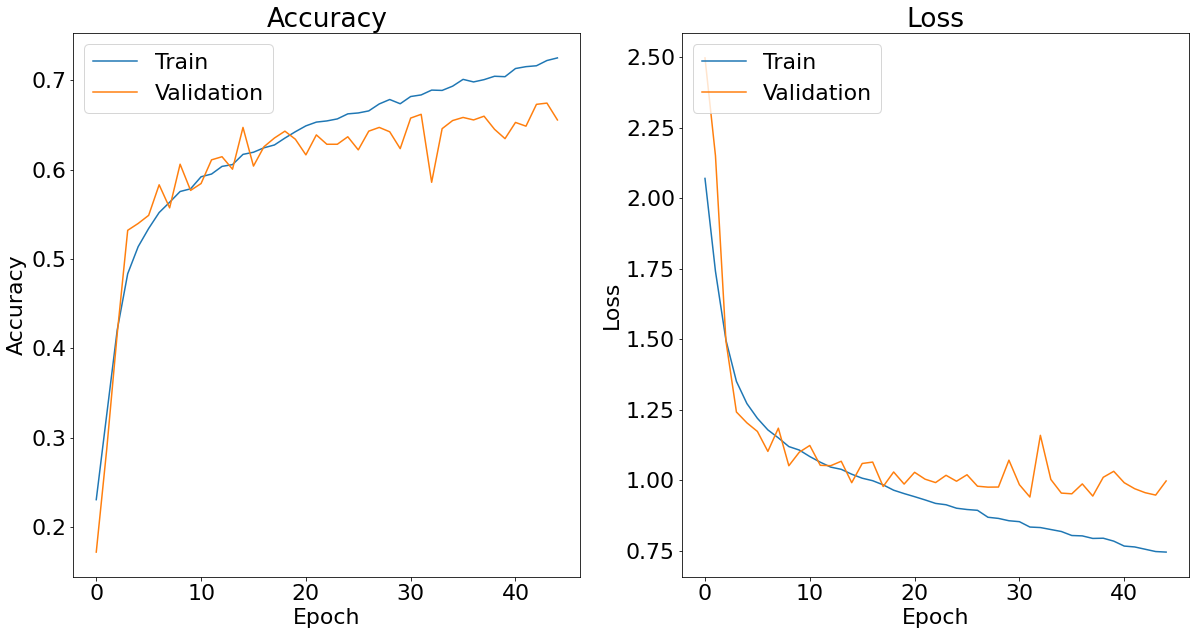

In [78]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

fig , ax = plt.subplots(1,2, figsize = (20, 10))
train_acc = history.history['accuracy']
train_loss = history.history['loss']


ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Save model

In [126]:
# save model
model.save("Emotion_detect")

INFO:tensorflow:Assets written to: Emotion_detect/assets


INFO:tensorflow:Assets written to: Emotion_detect/assets


# Model evaluation

In [97]:
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [37]:
#load the saved model
loaded_model = tf.keras.models.load_model('Emotion_detect')
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [95]:
model.evaluate(validation_generator)
preds = model.predict(validation_generator)
y_preds = np.argmax(preds , axis = 1 )
y_test = np.array(validation_generator.labels)

23/23 [==============================] - 2s 85ms/step


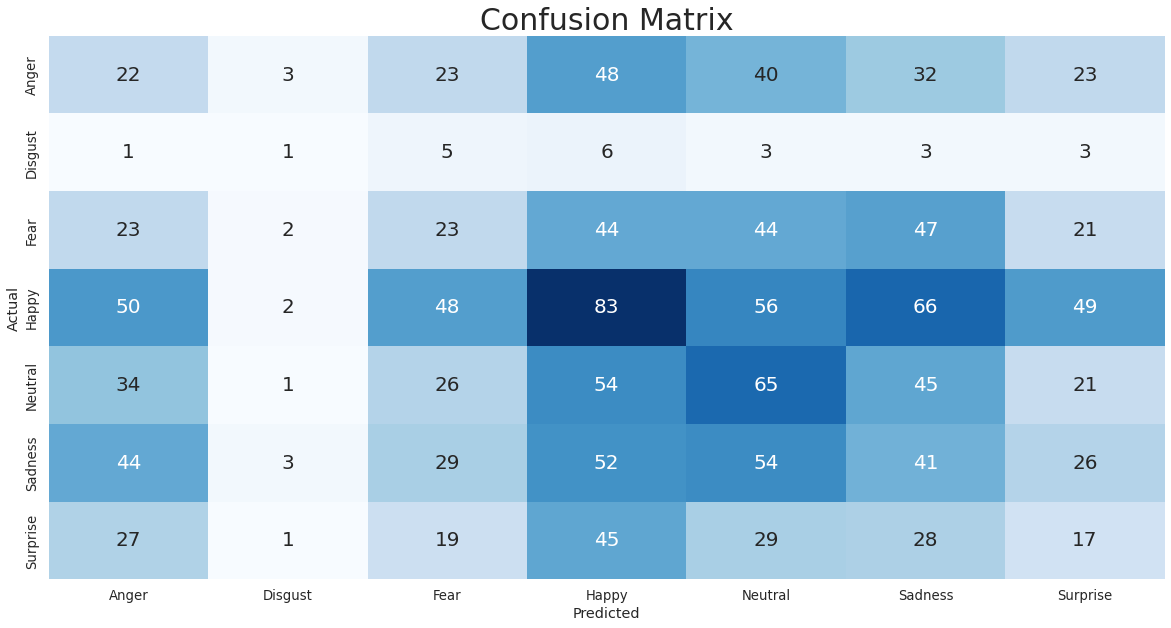

In [103]:
plt.rcParams.update({'font.size': 30})
cm_data = confusion_matrix(y_test , y_preds)
cm = pd.DataFrame(cm_data, columns = class_labels, index = class_labels)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 30)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 20}, fmt='g')

In [104]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.11      0.12      0.11       191
           1       0.08      0.05      0.06        22
           2       0.13      0.11      0.12       204
           3       0.25      0.23      0.24       354
           4       0.22      0.26      0.24       246
           5       0.16      0.16      0.16       249
           6       0.11      0.10      0.10       166

    accuracy                           0.18      1432
   macro avg       0.15      0.15      0.15      1432
weighted avg       0.17      0.18      0.17      1432



ROC AUC score: 0.5649370630598296


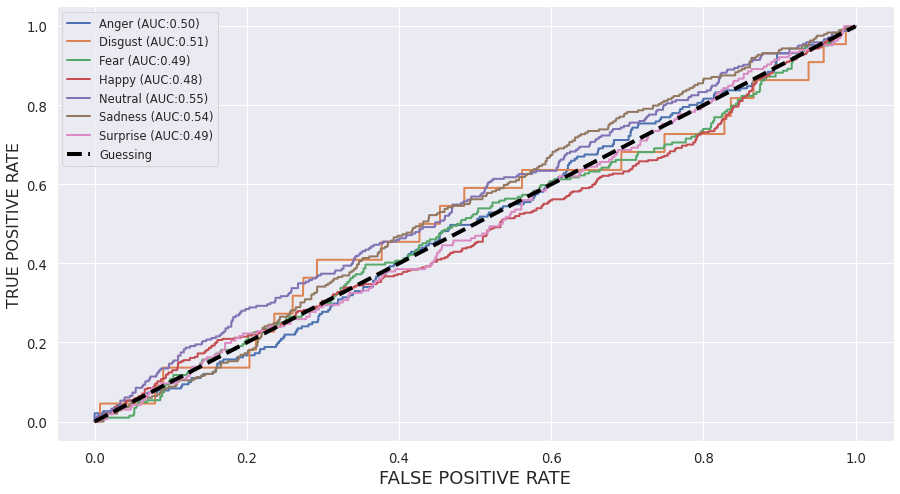

In [106]:
# Multiclass AUC Curve
fig, c_ax = plt.subplots(1,1, figsize = (15,8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(class_labels):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle = 'dashed', lw=4, label = 'Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test , preds  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show()

In [38]:
!pwd

/home/romagnolilab/Downloads/CSC4444


# Implement training on the test Data

In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image

In [116]:
def apply_model(img):
    img = np.array(img)
    plt.imshow(img)
    img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
    img = img.reshape(1,48,48,1)
    result = loaded_model.predict(img)
    result = list(result[0])
    img_index = result.index(max(result))
    print(label_dict[img_index])
    plt.show()

In [118]:
# Test model - 01
img = image.load_img("./test/fearful/im150.png", target_size = (48,48),color_mode = "grayscale")

1/1 [==============================] - 0s 14ms/step
Fear


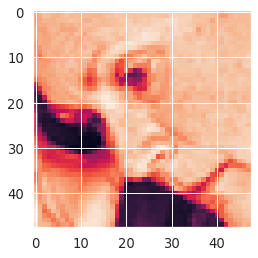

In [119]:
# use model
apply_model(img)

1/1 [==============================] - 0s 14ms/step
Surprise


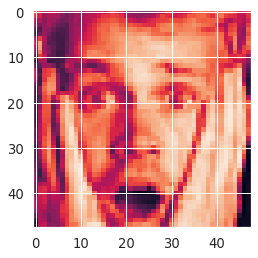

In [121]:
# Test model - 02
img02 = image.load_img("./test/surprised/im4.png", target_size = (48,48),color_mode = "grayscale")
# use model
apply_model(img02)

1/1 [==============================] - 0s 15ms/step
Angry


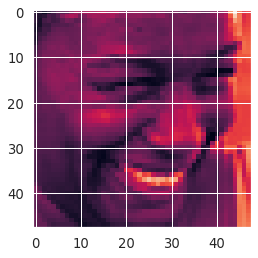

In [125]:
# Test model - 03
img05 = image.load_img("./test/happy/im5.png", target_size = (48,48),color_mode = "grayscale")
# use model
apply_model(img05)

If found useful,Please Upvote!!